In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style()

Взять код градиентного спуска для линейной регрессии (с занятия) и обучить ее

Методом nesterov momentum

Методом rmsprop

## Пример из практики

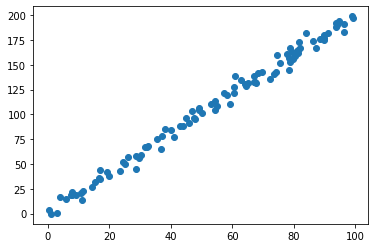

In [20]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

## Nesterov Accelerated Gradient

In [72]:
# Nesterov Accelerated Gradient

EPOCHS = 20
LEARNING_RATE = 0.0001
retention_rate = 0.9 # коэффициент сохранения

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))
v = [0.9, 0.9] # накопленное значение

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    v[0] = retention_rate * v[0] + LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    v[1] = retention_rate * v[1] + LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)  
    
    params[0] -= v[0]
    params[1] -= v[1]

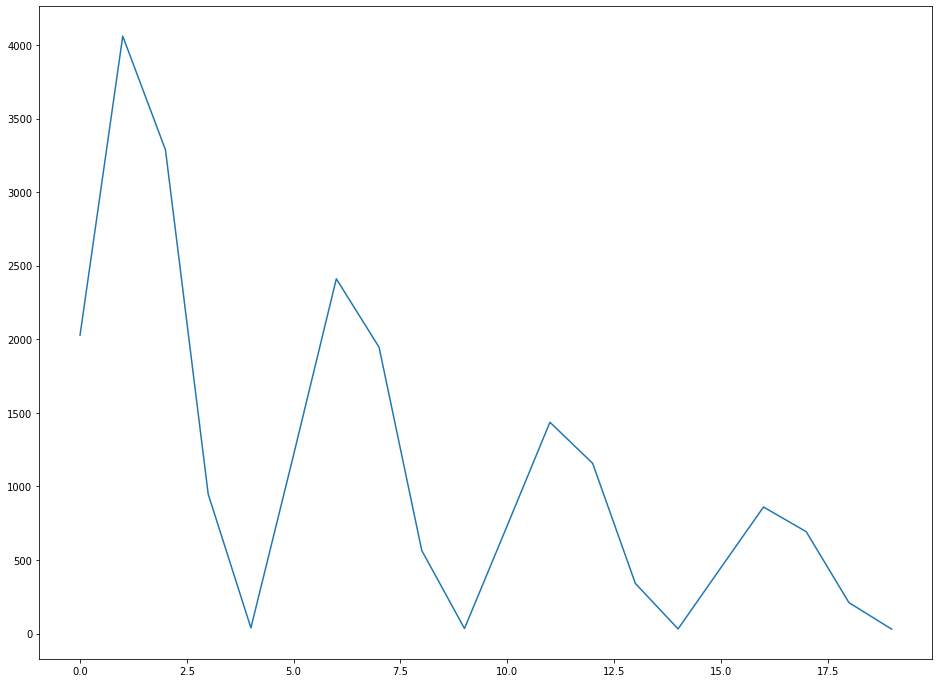

In [73]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

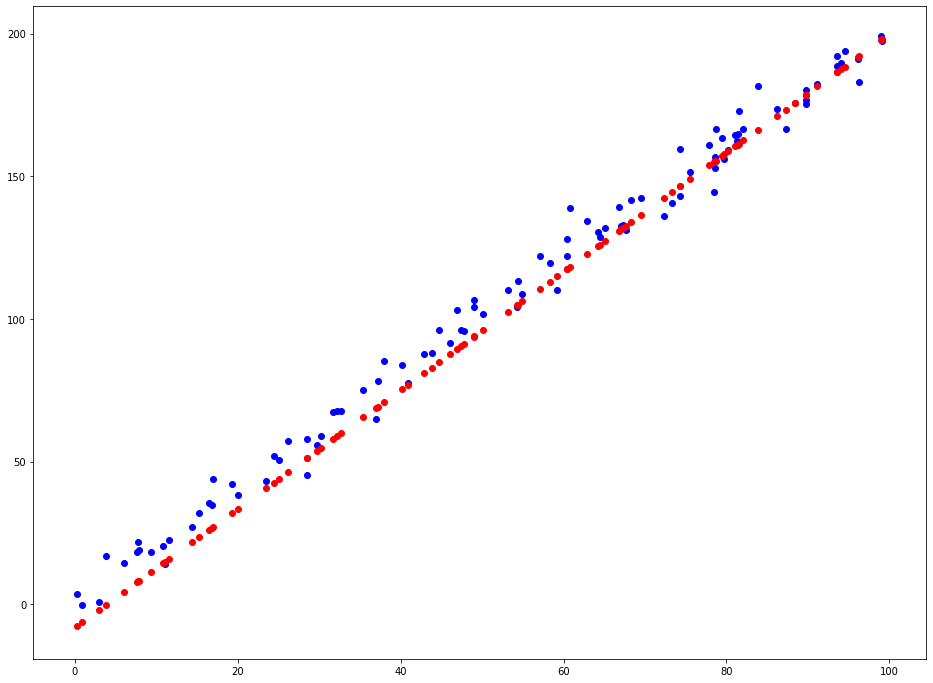

In [74]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[19], color='red')
plt.show()

## RMSProp

In [139]:
# RMSProp 

EPOCHS = 40
LEARNING_RATE = 0.0001
retention_rate = 0.9 # коэффициент сохранения
g = [0.9, 0.9]  # обновление параметра
ee = 1 * 10**-7  # сглаживающий параметр

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))
Eg = [0.9, 0.9]  # бегущее среднее

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    Eg[0] = retention_rate * Eg[0] + (1 - retention_rate) * g[0]**2
    Eg[1] = retention_rate * Eg[1] + (1 - retention_rate) * g[1]**2
    
    params[0] -= (LEARNING_RATE * g[0]) / (Eg[0] + ee)
    params[1] -= (LEARNING_RATE * g[1]) / (Eg[1] + ee)

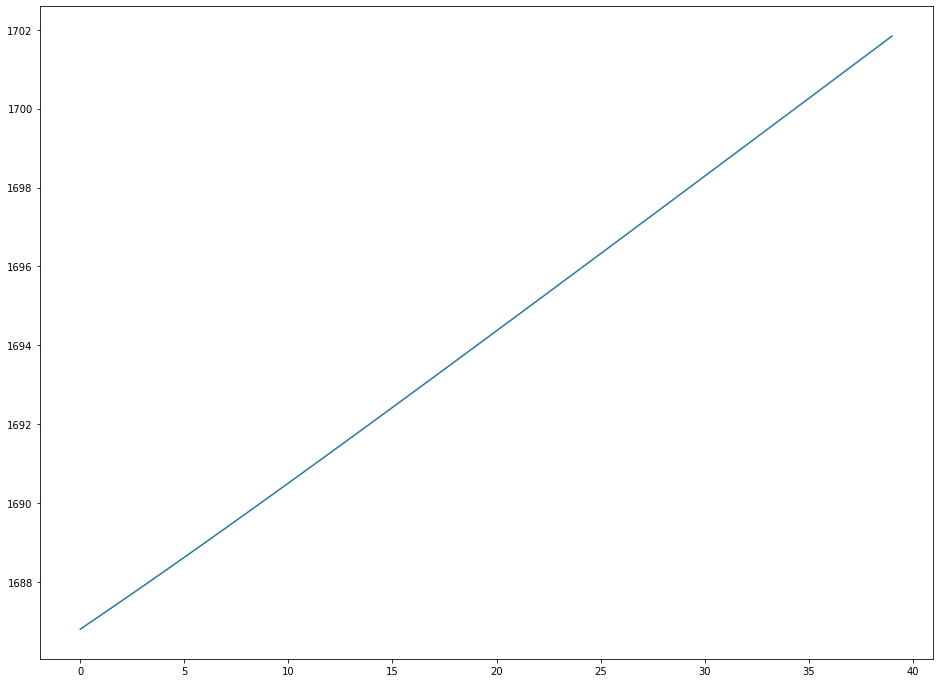

In [140]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

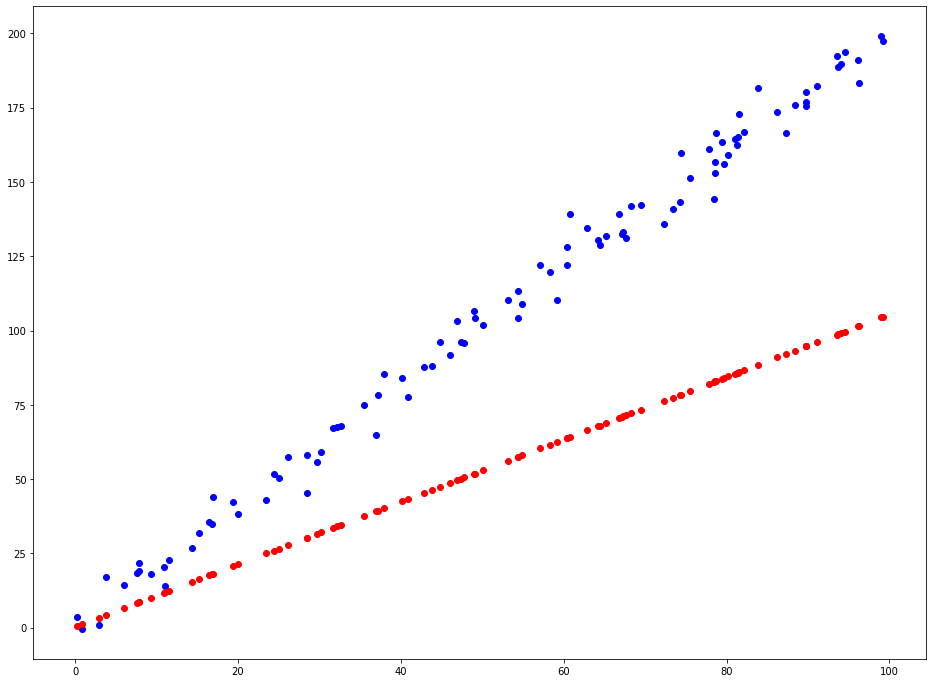

In [141]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[39], color='red')
plt.show()